<a href="https://colab.research.google.com/github/rileygoetz/DS1002-S24/blob/main/copy_of_06_pandas_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas exercises 1

1. Import dependencies

In [ ]:
import pandas as pd

---

In [ ]:
list = [98, 24, 46, 87, 33]

2. Convert `list` to a pandas series using `pd.Series`

In [ ]:
series = pd.Series(list)
print(series)

0    98
1    24
2    46
3    87
4    33
dtype: int64


**3**. Take the above series and add an index that starts at 2 and steps by 3

In [ ]:
index = range(2, 2 + len(list) * 3, 3)
series_with_index = pd.Series(list, index=index)
print(series_with_index)

2     98
5     24
8     46
11    87
14    33
dtype: int64


4. Create a dictionary of 4 names, ages, and careers   
Convert this dictionary to a pandas dataframe: `df`.  
Print the dataframe.

In [ ]:
data = {
    'Name': ['Abby', 'Julia', 'Aleeza', 'Addie'],
    'Age': [19, 20, 23, 18],
    'Career': ['Teacher', 'Doctor', 'Accountant', 'Lawyer']
}
df = pd.DataFrame(data)
print(df)

     Name  Age      Career
0    Abby   19     Teacher
1   Julia   20      Doctor
2  Aleeza   23  Accountant
3   Addie   18      Lawyer


5. Name the index of `df` 'participant_id'.  
Print `df`.

In [ ]:
df.index.name = 'particpant_id'
print(df)

                 Name  Age      Career
particpant_id                         
0                Abby   19     Teacher
1               Julia   20      Doctor
2              Aleeza   23  Accountant
3               Addie   18      Lawyer


6. Use a pandas function to determine the data types of the columns of `df`.

In [ ]:
print(df.dtypes)

Name      object
Age        int64
Career    object
dtype: object


7. Using bracket notation, reference column `name`

In [ ]:
name_column = df['Name']
print(name_column)

particpant_id
0      Abby
1     Julia
2    Aleeza
3     Addie
Name: Name, dtype: object


8. Using dot notation, reference column `name`

In [ ]:
name_column = df.Name
print(name_column)

particpant_id
0      Abby
1     Julia
2    Aleeza
3     Addie
Name: Name, dtype: object


8. Reference column `name` and have it returned in a dataframe.

In [ ]:
name_column_df = df[['Name']]
print(name_column_df)

                 Name
particpant_id        
0                Abby
1               Julia
2              Aleeza
3               Addie


*9*. Show the 3rd element in column `career`.

In [ ]:
third_career_element = df['Career'].iloc[2]
print(third_career_element)

Accountant


10.  Load the `iris` dataset that we used in class.  Use `iris` as the name of your data frame.

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
iris_data = load_iris()
iris = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
iris['species'] = iris_data.target
print(iris)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     species  
0          0

11.  What is the correlation between the variables `sepal_length` and `sepal_width` for all the irises?







In [ ]:
correlation = iris['sepal length (cm)'].corr(iris['sepal width (cm)'])
print("Correlation between sepal_length and sepal_width:", correlation)

Correlation between sepal_length and sepal_width: -0.11756978413300208


12.  Which of the three species has the highest correlation between `sepal_length` and `sepal_width`?  Show any calculations you use to support your answer.

In [ ]:
correlation_setosa = iris[iris['species'] == 0]['sepal length (cm)'].corr(iris[iris['species'] == 0]['sepal width (cm)'])
correlation_versicolor = iris[iris['species'] == 1]['sepal length (cm)'].corr(iris[iris['species'] == 1]['sepal width (cm)'])
correlation_virginica = iris[iris['species'] == 2]['sepal length (cm)'].corr(iris[iris['species'] == 2]['sepal width (cm)'])

# maximum correlation
max_correlation = max(correlation_setosa, correlation_versicolor, correlation_virginica)

# highest correlation
if max_correlation == correlation_setosa:
    species_with_max_correlation = 'Setosa'
elif max_correlation == correlation_versicolor:
    species_with_max_correlation = 'Versicolor'
else:
    species_with_max_correlation = 'Virginica'

print("Species with the highest correlation between sepal_length and sepal_width:", species_with_max_correlation)

Species with the highest correlation between sepal_length and sepal_width: Setosa


13.  Among the four variables, the two that are most negatively correlated (overall) are `sepal_width` and `petal_length`.  (How do we know this?)  Determine the same thing but for each species separately:  for each species, which two variables have the most negative (or the least positive) correlation?  Again, include calculations to support your answer.

In [ ]:
overall_correlation_matrix = iris.corr()

#most negative correlation coefficient
most_negative_correlation_overall = overall_correlation_matrix.unstack().sort_values().head(5)

print("Overall most negatively correlated variables:")
print(most_negative_correlation_overall)

Overall most negatively correlated variables:
sepal width (cm)   petal length (cm)   -0.428440
petal length (cm)  sepal width (cm)    -0.428440
species            sepal width (cm)    -0.426658
sepal width (cm)   species             -0.426658
petal width (cm)   sepal width (cm)    -0.366126
dtype: float64


In [ ]:
def most_negative_correlation_species(species):
    species_df = iris[iris['species'] == species]
    species_correlation_matrix = species_df.corr()
    most_negative_correlation_species = species_correlation_matrix.unstack().sort_values().head(5)
    return most_negative_correlation_species

# Calculate for each species
most_negative_correlation_setosa = most_negative_correlation_species(0)
most_negative_correlation_versicolor = most_negative_correlation_species(1)
most_negative_correlation_virginica = most_negative_correlation_species(2)

print("\nMost negatively correlated variables for Setosa:")
print(most_negative_correlation_setosa)

print("\nMost negatively correlated variables for Versicolor:")
print(most_negative_correlation_versicolor)

print("\nMost negatively correlated variables for Virginica:")
print(most_negative_correlation_virginica)


Most negatively correlated variables for Setosa:
sepal width (cm)   petal length (cm)    0.177700
petal length (cm)  sepal width (cm)     0.177700
sepal width (cm)   petal width (cm)     0.232752
petal width (cm)   sepal width (cm)     0.232752
sepal length (cm)  petal length (cm)    0.267176
dtype: float64

Most negatively correlated variables for Versicolor:
sepal length (cm)  sepal width (cm)     0.525911
sepal width (cm)   sepal length (cm)    0.525911
sepal length (cm)  petal width (cm)     0.546461
petal width (cm)   sepal length (cm)    0.546461
sepal width (cm)   petal length (cm)    0.560522
dtype: float64

Most negatively correlated variables for Virginica:
sepal length (cm)  petal width (cm)     0.281108
petal width (cm)   sepal length (cm)    0.281108
petal length (cm)  petal width (cm)     0.322108
petal width (cm)   petal length (cm)    0.322108
sepal width (cm)   petal length (cm)    0.401045
dtype: float64


14.  Once again, the variables `sepal_width` and `petal_length` are negatively correlated.  But for each individual species, these two variables are positively correlated.  How is this possible?  Explain this phenomenon.  Use a data visualization if it helps.


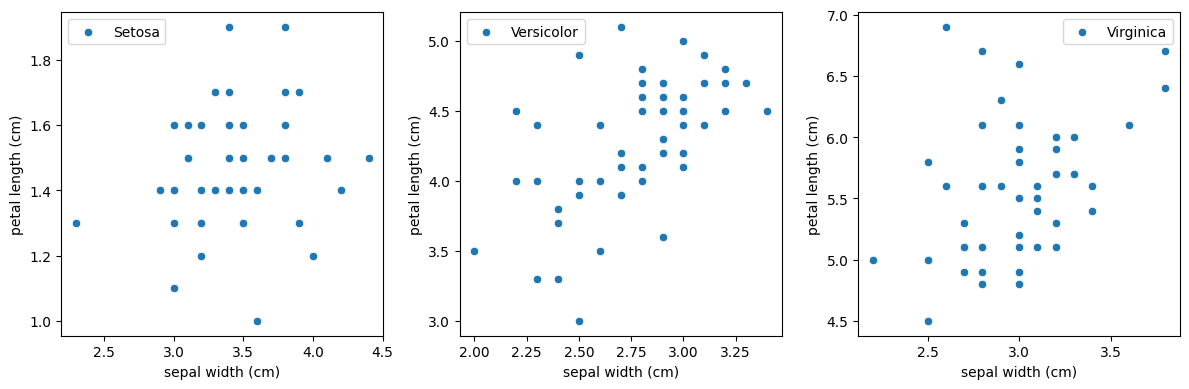

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plots
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.scatterplot(data=iris[iris['species'] == 0], x='sepal width (cm)', y='petal length (cm)', label='Setosa')

plt.subplot(1, 3, 2)
sns.scatterplot(data=iris[iris['species'] == 1], x='sepal width (cm)', y='petal length (cm)', label='Versicolor')

plt.subplot(1, 3, 3)
sns.scatterplot(data=iris[iris['species'] == 2], x='sepal width (cm)', y='petal length (cm)', label='Virginica')

plt.tight_layout()
plt.show()

The variables sepal_width and petal_length are negatively correlated but the individual species are positively correlated. This demonstrates how the relationship between variables can vary when considering different subsets of data.



